In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks


/content/drive/MyDrive/ColabNotebooks


**Preprocessing Data**

In [ ]:
import numpy as np

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets


cifar_data_1=unpickle('data_batch_1')
cifar_data_2=unpickle('data_batch_2')
cifar_data_3=unpickle('data_batch_3')
cifar_data_4=unpickle('test_batch')



# Access image data
data_images_1 = cifar_data_1[b'data']
data_labels_1 = cifar_data_1[b'labels']
data_labels_1=np.array(data_labels_1)



# Access image data
data_images_2= cifar_data_2[b'data']
data_labels_2 = cifar_data_2[b'labels']
data_labels_2=np.array(data_labels_2)



# Access image data
data_images_3= cifar_data_3[b'data']
data_labels_3 = cifar_data_3[b'labels']
data_labels_3=np.array(data_labels_3)



test_images= cifar_data_3[b'data']
test_labels = cifar_data_3[b'labels']
test_labels=np.array(test_labels)


# Concatenate the image data along the first axis (axis=0)
train_images = np.concatenate((data_images_1, data_images_2, data_images_3), axis=0)
train_labels = np.concatenate((data_labels_1, data_labels_2, data_labels_3), axis=0)

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images=train_images.reshape((30000, 3, 32, 32)).transpose(0,2, 3, 1)
test_images =test_images.reshape((10000, 3, 32, 32)).transpose(0,2, 3, 1)


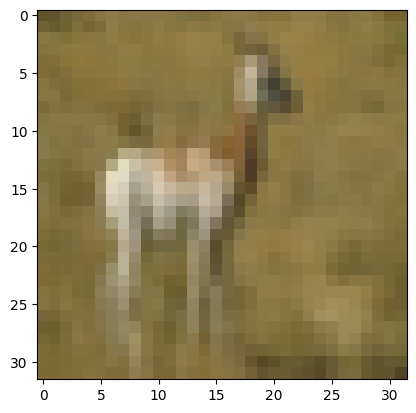

4


In [ ]:
import matplotlib.pyplot as plt
image=train_images[58]
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()
print(train_labels[58])


# **Relu Activation Model**




In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets



relu_model = models.Sequential()

relu_model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
relu_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

relu_model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
relu_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

relu_model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
relu_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

relu_model.add(layers.Flatten())

relu_model.add(layers.Dense(64, activation="relu"))
relu_model.add(layers.Dense(10, activation="softmax"))

relu_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

relu_model.summary()

relu_model.fit(train_images, train_labels, epochs=10, batch_size=32)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

# **Accuracy on Relu  dataset**

In [ ]:

test_loss, test_acc = relu_model.evaluate(test_images, test_labels)
print(f"Test accuracy of RELU ACTIVATION MODEL: {test_acc:.4f}")


313/313 [==============================] - 1s 2ms/step - loss: 0.5873 - accuracy: 0.7921
Test accuracy of RELU ACTIVATION MODEL: 0.7921


# **Sigmoid Activation Model**



In [ ]:


sigmoid_model = models.Sequential()

sigmoid_model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="sigmoid", input_shape=(32, 32, 3)))
sigmoid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

sigmoid_model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="sigmoid"))
sigmoid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

sigmoid_model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="sigmoid"))
sigmoid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

sigmoid_model.add(layers.Flatten())


sigmoid_model.add(layers.Dense(64, activation="sigmoid"))
sigmoid_model.add(layers.Dense(10, activation="softmax"))

sigmoid_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

sigmoid_model.summary()

sigmoid_model.fit(train_images, train_labels, epochs=10, batch_size=32)





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

# **Accuracy on sigmoid  dataset**




In [ ]:
test_loss, test_acc = sigmoid_model.evaluate(test_images, test_labels)
print(f"Test accuracy of sigmoid model: {test_acc:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 1.2156 - accuracy: 0.5716
Test accuracy of sigmoid model: 0.5716


# **Accuracy on Additinal  dataset**

In [ ]:
import numpy as np
additional_test_data = np.load('test_additional.npy')
additional_test_labels = np.load('labels.npy')

additional_test_data=additional_test_data/255.0
test_loss, test_acc = relu_model.evaluate(additional_test_data, additional_test_labels)
print(f"Test accuracy on additional datasetfor relu activation model {test_acc:.4f}")

test_loss, test_acc = sigmoid_model.evaluate(additional_test_data, additional_test_labels)
print(f"Test accuracy on additional dataset for sigmoid activation model: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 1.2655 - accuracy: 0.5986
Test accuracy on additional datasetfor relu activation model 0.5986
313/313 [==============================] - 1s 3ms/step - loss: 1.3517 - accuracy: 0.5155
Test accuracy on additional dataset for sigmoid activation model: 0.5155
